In [17]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import *

### Variablen

In [18]:
today = date.today()
ts = pd.to_datetime('2021-08-01', utc=True)

### Daten einlesen

In [19]:
pfad = "D:\\Github\\Auswertung_Covid_19\\input\\data-ovyiI.csv"

In [20]:
df_divi = pd.read_csv(pfad)
df_divi["date"] = pd.to_datetime(df_divi["date"], utc=True)
df_divi['date'] = pd.to_datetime(df_divi['date']).dt.date

# Datum Filter
df_divi = df_divi.loc[df_divi.date >= ts, :]
df_divi = df_divi.rename(columns={'COVID-19-Fälle':'DIVI'})

df_divi.head(3)

,date,DIVI
499,2021-08-01,360
500,2021-08-02,374
501,2021-08-03,375


In [21]:
df_who = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")

In [22]:
# data cleaning
df_who = df_who.drop(columns=['Country_code', 'WHO_region'])
df_who = df_who[df_who.New_cases != 0]

In [23]:
# Datentyp
df_who['Date_reported'] = pd.to_datetime(df_who['Date_reported'], utc=True)
df_who['Date_reported'] = pd.to_datetime(df_who['Date_reported']).dt.date
# Filter Datum
df_who = df_who.loc[df_who.Date_reported >= ts, :]
# Filter Land
df_who = df_who.loc[df_who.Country == "Germany"]
df_who.head(3)

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
55644,2021-08-01,Germany,2097,3771262,1,91659
55645,2021-08-02,Germany,847,3772109,1,91660
55646,2021-08-03,Germany,1766,3773875,19,91679


In [24]:
df_who = df_who.rename(columns={'Date_reported':'date'})
df_who.head(3)

,date,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
55644,2021-08-01,Germany,2097,3771262,1,91659
55645,2021-08-02,Germany,847,3772109,1,91660
55646,2021-08-03,Germany,1766,3773875,19,91679


In [25]:
df_merge = df_who.merge(df_divi, on="date", how="left")
df_merge.head(3)

,date,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,DIVI
0,2021-08-01,Germany,2097,3771262,1,91659,360.0
1,2021-08-02,Germany,847,3772109,1,91660,374.0
2,2021-08-03,Germany,1766,3773875,19,91679,375.0


In [26]:
df_merge['MA'] = df_merge['New_cases'].rolling(window=7, min_periods=1).mean()
df_merge['MA_d'] = df_merge['New_deaths'].rolling(window=7, min_periods=1).mean()
case_fatality = str(round( 100 * (df_merge["MA_d"].iloc[-1] / df_merge["MA"].iloc[-20]),1 ))
df_merge.head(3)

,date,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,DIVI,MA,MA_d
0,2021-08-01,Germany,2097,3771262,1,91659,360.0,2097.0,1.0
1,2021-08-02,Germany,847,3772109,1,91660,374.0,1472.0,1.0
2,2021-08-03,Germany,1766,3773875,19,91679,375.0,1570.0,7.0


### Rechnen

In [27]:
MA_max = df_merge['MA'].max()
MA_d_max = df_merge['MA_d'].max()
divi_max = df_merge['DIVI'].max()
print(MA_max)
print(MA_d_max)
print(divi_max)

58107.71428571428
322.42857142857144
4925.0


In [28]:
df_merge['cases'] = 100 * (df_merge['MA'] / MA_max)
df_merge['deaths'] = 100 * (df_merge['MA_d'] / MA_d_max)
df_merge['divi'] = 100 * (df_merge['DIVI'] / divi_max)

# df_merge = df_merge.drop(columns=['New_cases', 'New_deaths', 'COVID-19-Fälle', 'MA', 'MA_d'])
df = df_merge
df.head(3)

,date,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,DIVI,MA,MA_d,cases,deaths,divi
0,2021-08-01,Germany,2097,3771262,1,91659,360.0,2097.0,1.0,3.608815,0.310146,7.309645
1,2021-08-02,Germany,847,3772109,1,91660,374.0,1472.0,1.0,2.533226,0.310146,7.593909
2,2021-08-03,Germany,1766,3773875,19,91679,375.0,1570.0,7.0,2.701879,2.171023,7.614213


### Visualisierung

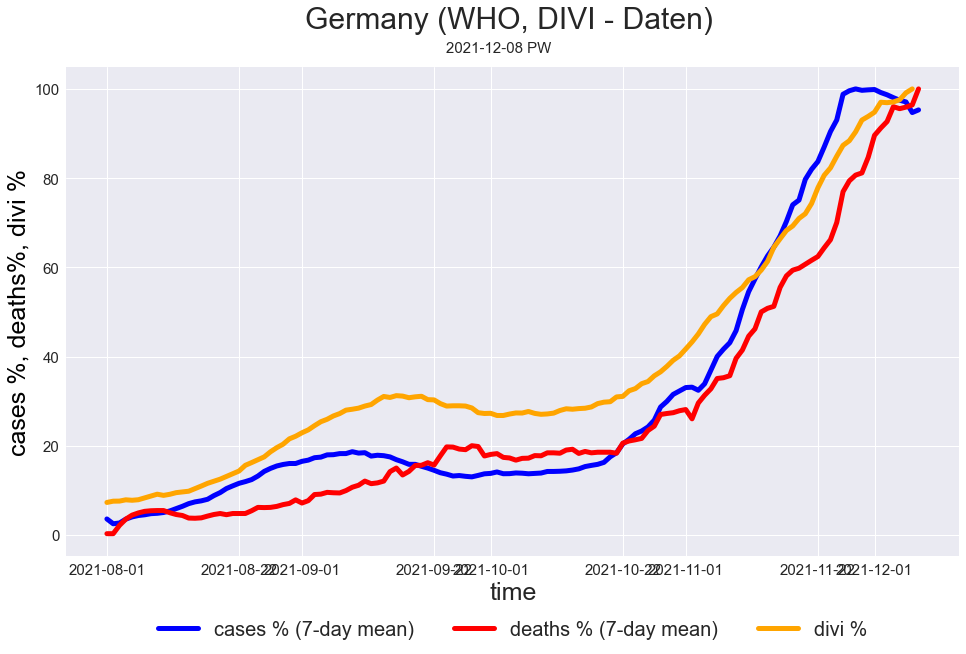

In [29]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(16, 9))
# formatter = FuncFormatter(y_axis_thousands)
# ax.yaxis.set_major_formatter(formatter)

plt.plot(df.date, df['cases'], color="blue", marker="", linestyle="solid", label="cases % (7-day mean)",
         linewidth=5)
plt.plot(df.date, df['deaths'], color="red", marker="", linestyle="solid", label="deaths % (7-day mean)",
         linewidth=5)
plt.plot(df.date, df['divi'], color="orange", marker="", linestyle="solid", label="divi %",
         linewidth=5)
ax.set_xlabel("time", fontsize=25)
ax.set_ylabel("cases %, deaths%, divi %", color="black", fontsize=25)

ax.tick_params(labelsize=15)

plt.legend(loc='center',
           bbox_to_anchor=(0.5, -0.15),
           fancybox=True,
           shadow=True,
           ncol=3,
           fontsize=20)

plt.title(f'Germany (WHO, DIVI - Daten) \n', fontsize=30)

plt.suptitle(f'{today} PW',
             fontsize=15, y=0.92)
plt.savefig("D:\\Github\\Auswertung_Covid_19\\Output\\who_divi.png", dpi=200, bbox_inches='tight')

In [30]:
df

,date,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,DIVI,MA,MA_d,cases,deaths,divi
0,2021-08-01,Germany,2097,3771262,1,91659,360.0,2097.000000,1.000000,3.608815,0.310146,7.309645
1,2021-08-02,Germany,847,3772109,1,91660,374.0,1472.000000,1.000000,2.533226,0.310146,7.593909
2,2021-08-03,Germany,1766,3773875,19,91679,375.0,1570.000000,7.000000,2.701879,2.171023,7.614213
3,2021-08-04,Germany,3571,3777446,25,91704,389.0,2070.250000,11.500000,3.562780,3.566681,7.898477
4,2021-08-05,Germany,3539,3780985,26,91730,384.0,2364.000000,14.400000,4.068307,4.466105,7.796954
...,...,...,...,...,...,...,...,...,...,...,...,...
125,2021-12-04,Germany,64510,6116070,378,102946,4781.0,56967.857143,309.571429,98.038372,96.012406,97.076142
126,2021-12-05,Germany,42055,6158125,94,103040,4805.0,56632.714286,308.142857,97.461611,95.569340,97.563452
127,2021-12-06,Germany,27836,6185961,81,103121,4882.0,56414.428571,309.285714,97.085954,95.923793,99.126904
128,2021-12-07,Germany,36059,6222020,399,103520,4925.0,55029.571429,310.857143,94.702695,96.411165,100.000000


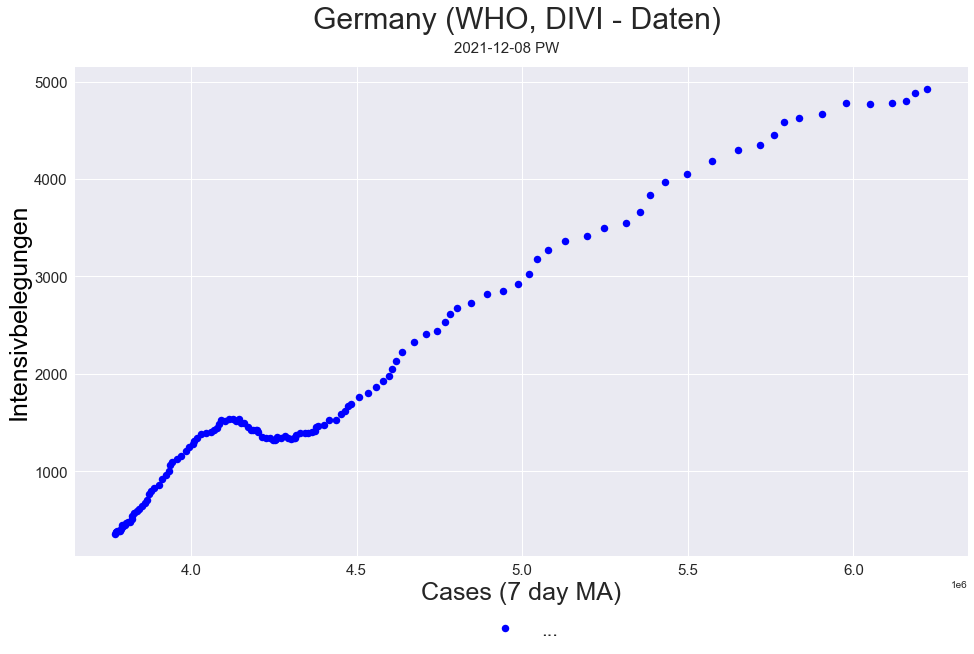

In [35]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(16, 9))
# formatter = FuncFormatter(y_axis_thousands)
# ax.yaxis.set_major_formatter(formatter)

plt.plot(df['Cumulative_cases'], df['DIVI'], color="blue", marker=".", markersize=15, linestyle="", label="...",
         linewidth=5)
# plt.plot(df.date, df['deaths'], color="red", marker="", linestyle="solid", label="deaths % (7-day mean)",
#          linewidth=5)
# plt.plot(df.date, df['divi'], color="orange", marker="", linestyle="solid", label="divi %",
#          linewidth=5)
ax.set_xlabel("Cases (7 day MA)", fontsize=25)
ax.set_ylabel("Intensivbelegungen", color="black", fontsize=25)

ax.tick_params(labelsize=15)

plt.legend(loc='center',
           bbox_to_anchor=(0.5, -0.15),
           fancybox=True,
           shadow=True,
           ncol=3,
           fontsize=20)

plt.title(f'Germany (WHO, DIVI - Daten) \n', fontsize=30)

plt.suptitle(f'{today} PW',
             fontsize=15, y=0.92)
plt.savefig("D:\\Github\\Auswertung_Covid_19\\Output\\who_divi2.png", dpi=200, bbox_inches='tight')

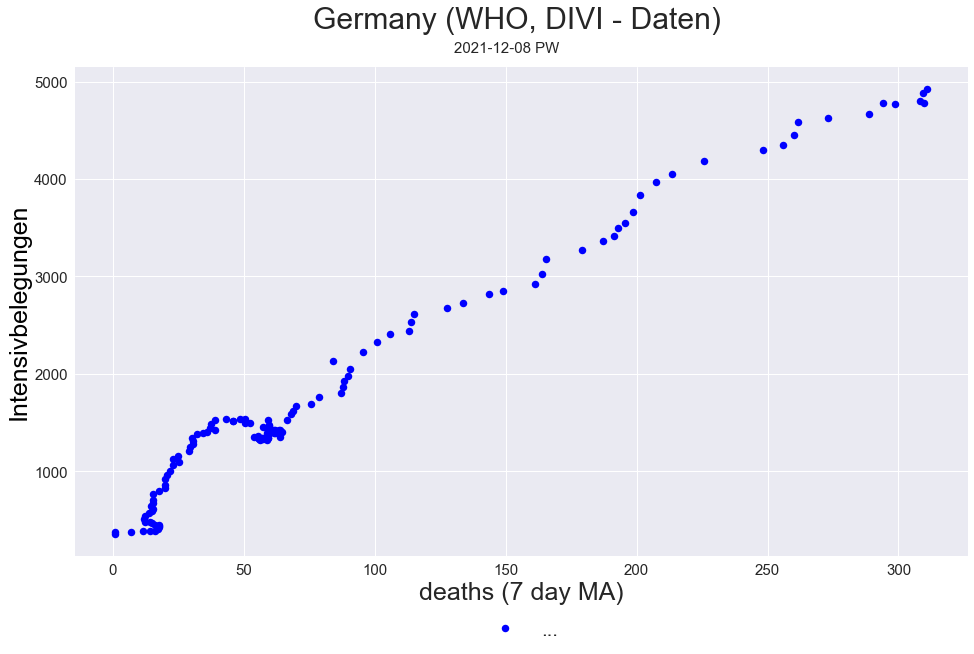

In [32]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(16, 9))
# formatter = FuncFormatter(y_axis_thousands)
# ax.yaxis.set_major_formatter(formatter)

plt.plot(df['MA_d'], df['DIVI'], color="blue", marker=".", markersize=15, linestyle="", label="...",
         linewidth=5)
# plt.plot(df.date, df['deaths'], color="red", marker="", linestyle="solid", label="deaths % (7-day mean)",
#          linewidth=5)
# plt.plot(df.date, df['divi'], color="orange", marker="", linestyle="solid", label="divi %",
#          linewidth=5)
ax.set_xlabel("deaths (7 day MA)", fontsize=25)
ax.set_ylabel("Intensivbelegungen", color="black", fontsize=25)

ax.tick_params(labelsize=15)

plt.legend(loc='center',
           bbox_to_anchor=(0.5, -0.15),
           fancybox=True,
           shadow=True,
           ncol=3,
           fontsize=20)

plt.title(f'Germany (WHO, DIVI - Daten) \n', fontsize=30)

plt.suptitle(f'{today} PW',
             fontsize=15, y=0.92)
plt.savefig("D:\\Github\\Auswertung_Covid_19\\Output\\who_divi3.png", dpi=200, bbox_inches='tight')